In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

from mlxtend.plotting import plot_decision_regions

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2)

> Compare os metodos de classificação vistos nessa aula para a base vertebralcolumn-3C.

In [2]:
df_vertebral = pd.read_csv('data/vertebralcolumn-3C.csv')
df_vertebral.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
# Separando features e targets
target = 'class'
features = df_vertebral.columns.to_list()
features.remove(target)

X = df_vertebral[features]
y = df_vertebral[target]

print(X.shape)
print(y.shape)

(310, 6)
(310,)


In [4]:
# Separando conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(248, 6)
(62, 6)
(248,)
(62,)


In [5]:
# Dicionário com os nossos modelos
models = {
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier()
}

# Onde vamos salvar as acurácias
scores = {}

# Treinando e testando os modelos
for clf_name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    scores[clf_name] = acc

Text(0.5, 1.0, 'Comparação modelos aula')

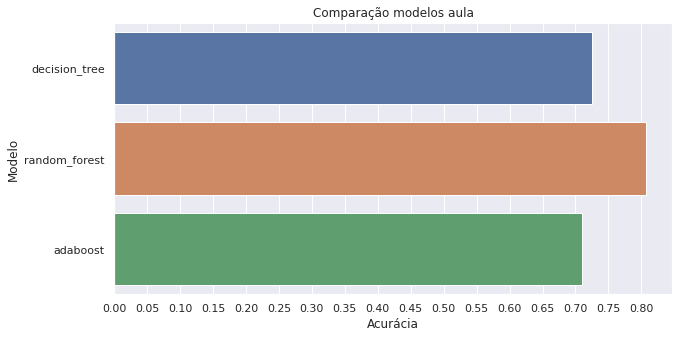

In [6]:
# Vamos usar um plot para ver o resultado

plt.figure(figsize=(10, 5))

sns.barplot(list(scores.values()), list(scores.keys()))
plt.xticks(np.arange(0, 0.85, 0.05));
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.title('Comparação modelos aula')

### 3)

In [7]:
# Dicionário com os nossos modelos
models = {
    'decision_tree': BaggingClassifier(DecisionTreeClassifier(), n_estimators=10),
    'random_forest': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier()
}

# Vamos criar um dicionario onde cada modelo tem uma lista que serão salvos os resultados
scores = {}
for clf_name in models.keys():
    scores[clf_name] = []

In [8]:
# Lista com porcentagens dos dados que será mantida
percentages = np.arange(0.2, 1.05, 0.05)

for perc in percentages:
    for clf_name, clf in models.items():
        # Numero de dados que iremos usar no treino
        N = int(perc * X_train.shape[0])
        
        # Selecionamos indice de só N exemplos do treino
        selected_idx = np.random.choice(np.arange(X_train.shape[0]), N, replace=False)
        X_selected = X_train[selected_idx]
        y_selected = y_train[selected_idx]
        
        
        # Treinando e fazendo prediçoes
        clf.fit(X_selected, y_selected)
        y_pred = clf.predict(X_test)
        
        # Calculando acurácia e salvando
        acc = accuracy_score(y_test, y_pred)
        scores[clf_name].append(acc)

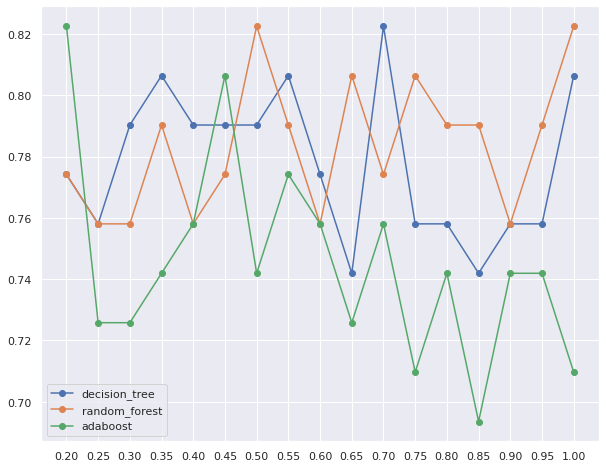

In [9]:
plt.figure(figsize=(10, 8))

for clf_name in models.keys():
    plt.plot(percentages, scores[clf_name], '-o', label=clf_name)

plt.xticks(percentages)
plt.legend();

### 4)
> Considerando a base de dados Vehicle, projete os dados em duas dimensões usando PCA e mostre as regiões de separação como feito acima.

In [10]:
df_vehicles = pd.read_csv('data/Vehicle.csv')
df_vehicles.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [11]:
# Separando features e targets
target = 'Class'
features = df_vehicles.columns.to_list()
features.remove(target)

X = df_vehicles[features]
y = df_vehicles[target]

print(X.shape)
print(y.shape)

(846, 18)
(846,)


In [12]:
# Precisamos de numeros como target (até aqui era van, bus, ...)
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Precisamos aplicar o PCA nos nossos dados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/home/sutter/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


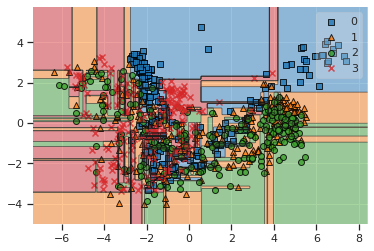

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_pca, y)
plot_decision_regions(X_pca, y, clf)

### 5)
> Faça a classificação dos dados gerados artificialmente com o código abaixo. Compare os resultados para os métodos vistos nessa aula.

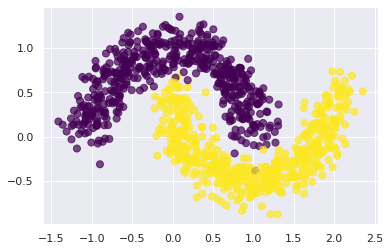

In [15]:
plt.figure(figsize=(6,4))

n_samples = 1000

data  = make_moons(n_samples=n_samples, noise=.15)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [16]:
# Separando conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [17]:
# Dicionário com os nossos modelos
models = {
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier()
}

# Onde vamos salvar as acurácias
scores = {}

# Treinando e testando os modelos
for clf_name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    scores[clf_name] = acc

Text(0.5, 1.0, 'Comparação modelos aula')

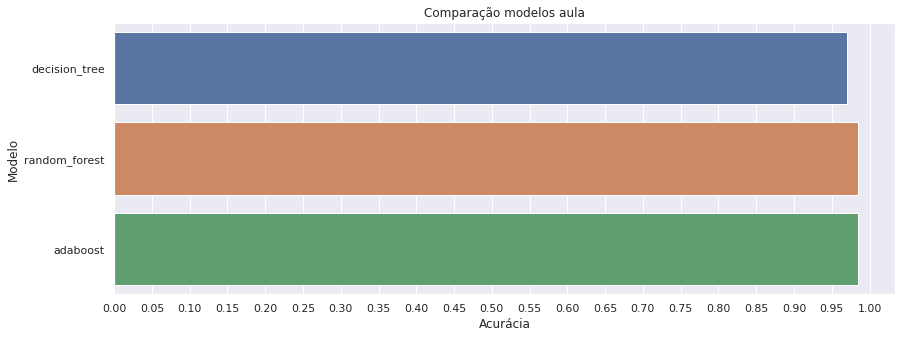

In [18]:
# Vamos usar um plot para ver o resultado

plt.figure(figsize=(14, 5))

sns.barplot(list(scores.values()), list(scores.keys()))
plt.xticks(np.arange(0, 1.05, 0.05));
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.title('Comparação modelos aula')

### 6)
> Encontre a região de separação dos dados do exercício anterior usando Random Forest e Bagging.

/home/sutter/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


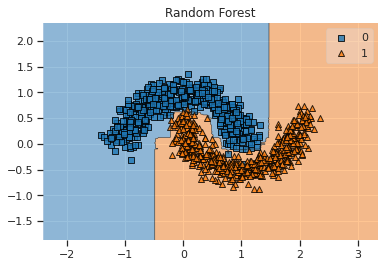

In [19]:
# Fitando nosso modelo
clf = RandomForestClassifier()
clf.fit(X, y)

# Observando as fronteiras de predição
plot_decision_regions(X, y, clf)
plt.title('Random Forest');

/home/sutter/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


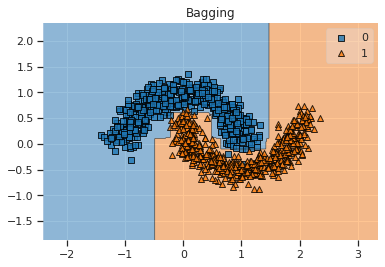

In [20]:
# Fitando nosso modelo
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
clf.fit(X, y)

# Observando as fronteiras de predição
plot_decision_regions(X, y, clf)
plt.title('Bagging');